## 1. Preparacion del entorno

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')


## 2. Carga de Datos

In [7]:
df_listings = pd.read_csv("../../data/listings.csv")
print("✅ Cargado listings.csv:", df_listings.shape)
df_listings.head()
print(df_listings["bathrooms"].value_counts())
print(df_listings["bathrooms_text"].value_counts())


✅ Cargado listings.csv: (19422, 79)
bathrooms
1.0     9237
2.0     3931
1.5      890
3.0      341
0.0      278
2.5      211
4.0      128
0.5      118
3.5       41
5.0       32
8.0       26
6.0       21
4.5        9
5.5        4
7.5        3
12.0       3
7.0        3
9.0        2
50.0       1
10.0       1
Name: count, dtype: int64
bathrooms_text
1 bath               7882
2 baths              3866
1 shared bath        2674
1 private bath       1520
1.5 baths             774
2 shared baths        741
1.5 shared baths      445
3 baths               377
0 baths               189
2.5 baths             156
0 shared baths        154
4 baths               140
2.5 shared baths       83
Shared half-bath       61
3 shared baths         60
Half-bath              56
4 shared baths         34
3.5 baths              29
5 baths                29
6 baths                28
Private half-bath      25
8 shared baths         18
3.5 shared baths       16
4.5 baths              12
8 baths                11
5 s

## 3. Estructura General

In [8]:

print("📝 Tipos de datos:")
print(df_listings.dtypes.value_counts())
print("\n📦 Valores únicos por columna:")
print(df_listings.nunique().sort_values())


📝 Tipos de datos:
object     36
float64    23
int64      20
Name: count, dtype: int64

📦 Valores únicos por columna:
calendar_updated              0
scrape_id                     1
host_has_profile_pic          2
source                        2
host_identity_verified        2
                          ...  
amenities                 17184
name                      18639
picture_url               19145
listing_url               19422
id                        19422
Length: 79, dtype: int64


## 4. Valores Faltantes

❗ Nulos por columna:


,Nulos,%
description,746,3.8
neighborhood_overview,9847,50.7
host_name,7,0.0
host_since,7,0.0
host_location,4503,23.2
host_about,7214,37.1
host_response_time,3127,16.1
host_response_rate,3127,16.1
host_acceptance_rate,2767,14.2
host_is_superhost,554,2.9


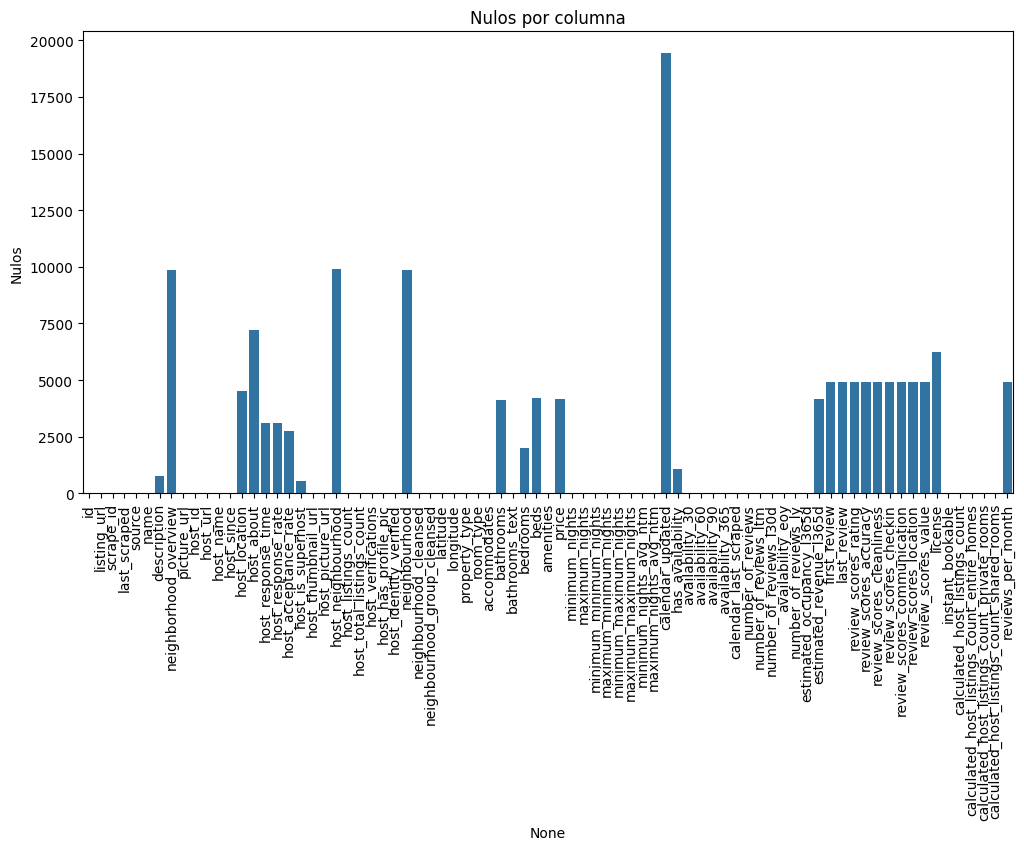

🔁 Duplicados: 0


In [13]:
missing = df_listings.isnull().sum()
pct = (missing / len(df_listings) * 100).round(1)
missing_df = pd.DataFrame({"Nulos": missing, "%": pct})
print("❗ Nulos por columna:")
display(missing_df[missing_df["Nulos"] > 0])

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.index, y=missing_df["Nulos"])
plt.xticks(rotation=90)
plt.title("Nulos por columna")
plt.show()

print("🔁 Duplicados:", df_listings.duplicated().sum())


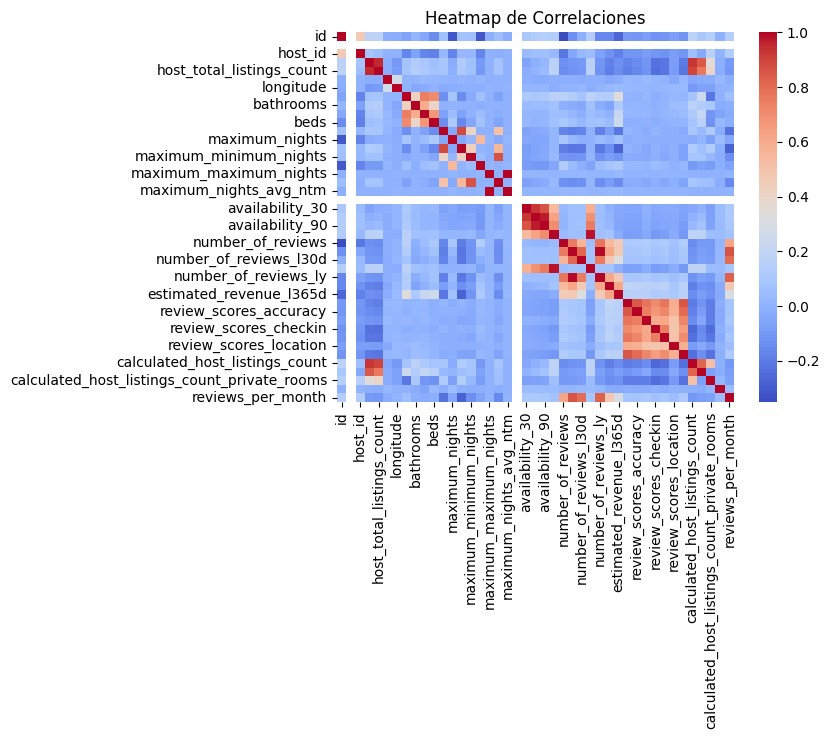

In [12]:
corr = df_listings.select_dtypes(include='number').corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Heatmap de Correlaciones")
plt.show()

<Figure size 1400x600 with 0 Axes>

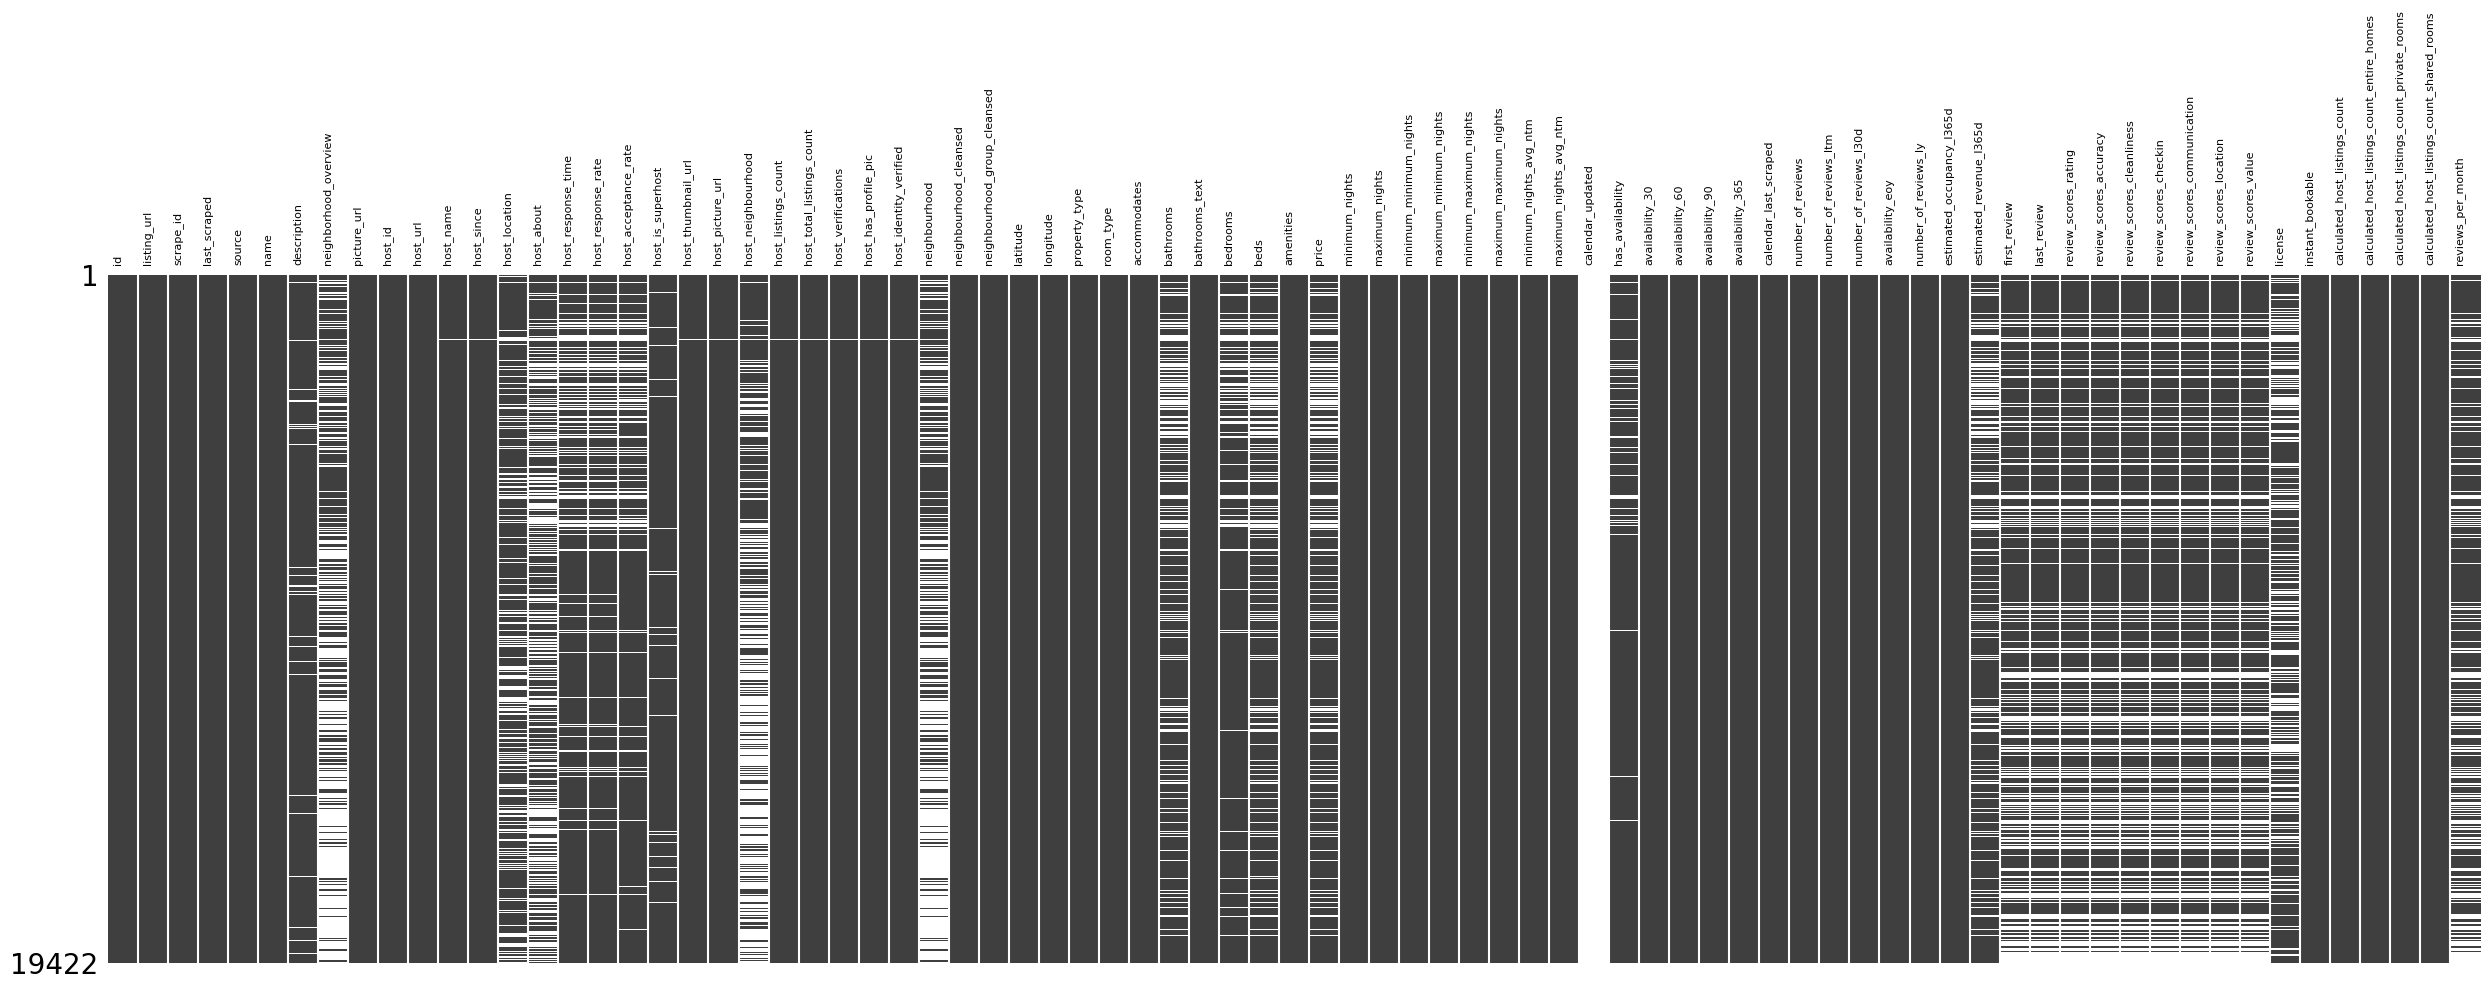

In [17]:
import matplotlib.pyplot as plt
import missingno as msno

# Ajusta el tamaño del lienzo para que quepan bien las etiquetas
plt.figure(figsize=(14, 6))

# Dibuja la matriz
ax = msno.matrix(df_listings, sparkline=False)

# Personaliza las etiquetas del eje x
ax.set_xticks(range(len(df_listings.columns)))               # un tick por columna
ax.set_xticklabels(df_listings.columns, rotation=90, fontsize=8, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
from pyampute.exploration.mcar_statistical_tests import MCARTest

# 2.1 Selecciona solo variables numéricas (o codificadas)  
X_num = df_listings.select_dtypes(include='number').values  

# 2.2 Ejecuta Little’s MCAR Test  
tester = MCARTest(method='little')
tester.test(X_num)
chi2_stat = tester.result_['chi2']
p_val = tester.result_['p_value']

print(f"Little’s MCAR → χ²={chi2_stat:.2f}, p‑valor={p_val:.3f}")

AttributeError: 'MCARTest' object has no attribute 'fit'